In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, optimizers, datasets, layers, models
from tensorflow.keras.utils import plot_model, to_categorical
from sklearn.metrics import accuracy_score
from PIL import ImageFont
import warnings
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#Loading the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
#Checking the shape of the dataset
print('X_train Shape: {}'.format(x_train.shape))
print('X_test Shape: {}'.format(x_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


# Normalizing and One-hot encoding

* We have to normalize the data in order to reduce the pixel values. Currently, all the image pixels are in a range from 0-255, and we want the values in the range of 0 and 1. So we can either divide all the pixel values by 255.0 or use the 'normalize' command from keras library. As CIFAR-10 has 10 classes, we are using the **to_categorical()** method to one-hot encode the data **keras.datasets** command.  

In [5]:
#Normalizing the data
x_train = x_train / 255
x_test = x_test / 255

In [6]:
#One hot encoding
y_train_en = to_categorical(y_train, 10)
y_test_en = to_categorical(y_test, 10)

* **to_categorical()** converts a class vector (integers) to binary class matrix.
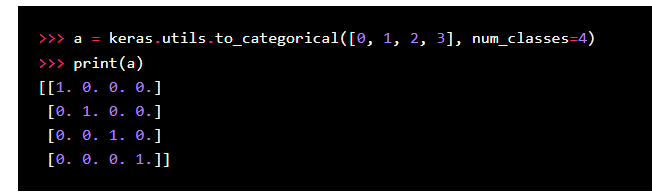

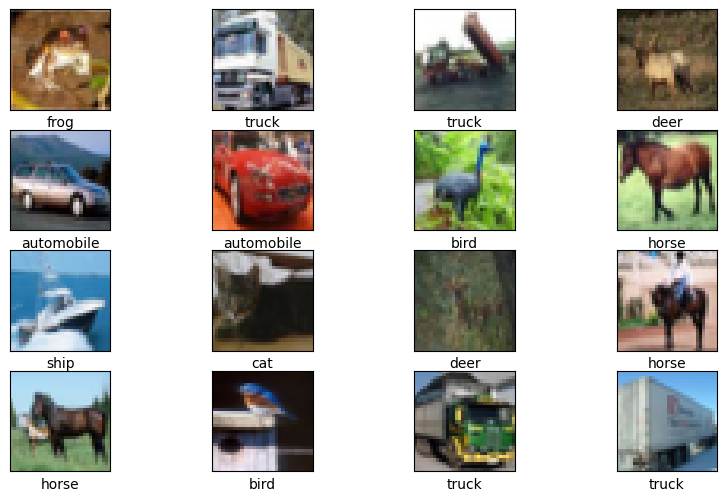

In [7]:
#Viewing the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,6))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])

plt.show()

# Building the model

## Model Architecture

**Convolution layer 1**
* Filter size : 64 filters of size (4,4)
* Activation : ReLU
* Padding : Same
* Input Shape : (32,32,3)
* **Conv2D** is used to extract the features using convolution.
* **Batch Normalization** normalizes the acticvations from the previous layer.

**Convolution layer 2**
* Filter size : 64 filters of size (4,4)
* Activation : ReLU
* Padding : Same
* **Conv2D** is used to extract more features using convolution.
* **Batch Normalization** normalizes the acticvations. layer.

**Max Pooling Layer**
* Pool Size : (2,2)
* **MaxPooling2D** reduces spatial dimensions.

**Dropout Layer**
* Dropout Rate : 0.2
* **Dropout** reduces overfitting by randomly dropping neurons.

**Convolution layer 3**
* Filter size : 128 filters of size (4,4)
* Activation : ReLU
* Padding : Same
* **Conv2D** is used to extract more features using convolution.
* **Batch Normalization** normalizes the acticvations.

**Convolution layer 4**
* Filter size : 128 filters of size (4,4)
* Activation : ReLU
* Padding : Same
* **Conv2D** is used to extract more features using convolution.
* **Batch Normalization** normalizes the acticvations.

**Max Pooling Layer**
* Pool Size : (2,2)
* **MaxPooling2D** further reduces spatial dimensions.

**Dropout Layer**
* Dropout Rate : 0.25
* **Dropout** further reduces overfitting 

**Convolution layer 5**
* Filter size : 128 filters of size (4,4)
* Activation : ReLU
* Padding : Same
* **Conv2D** is used to extract more features using convolution.
* **Batch Normalization** normalizes the acticvations.

**Convolution layer 6**
* Filter size : 128 filters of size (4,4)
* Activation : ReLU
* Padding : Same
* **Conv2D** is used to extract more features using convolution.
* **Batch Normalization** normalizes the acticvations.

**Max Pooling Layer**
* Pool Size : (2,2)
* **MaxPooling2D** further reduces spatial dimensions.

**Dropout Layer**
* Dropout Rate : 0.35
* **Dropout** further reduces overfitting.

In [8]:
#Intializing the model
model = Sequential()

In [9]:
#Adding the relevant layers to the model
####Convolution layers######
#Convolution layer 1
model.add(Conv2D(64,(4,4), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization())

#Convolution layer 2
model.add(Conv2D(64,(4,4), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Convolution layer 3
model.add(Conv2D(128,(4,4), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization())

#Convolution layer 4
model.add(Conv2D(128,(4,4), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Convolution layer 5
model.add(Conv2D(128,(4,4), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization())

#Convolution layer 6
model.add(Conv2D(128,(4,4), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))

#Flattening the data
model.add(Flatten())

#####Dense layers########
#Dense layer 1
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Dense layer 2
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

In [12]:
#Fitting the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [13]:
history = model.fit(x_train, y_train_en, epochs=100, verbose=1, validation_data = (x_test, y_test_en), callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5618 - accuracy: 0.4697 - val_loss: 1.1586 - val_accuracy: 0.5864
Epoch 2/100
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9499 - accuracy: 0.6698 - val_loss: 0.8225 - val_accuracy: 0.7076
Epoch 3/100
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7613 - accuracy: 0.7393 - val_loss: 0.7944 - val_accuracy: 0.7292
Epoch 4/100
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6459 - accuracy: 0.7794 - val_loss: 0.8262 - val_accuracy: 0.7183
Epoch 5/100
1563/1563 [==============================] - 43s 27ms/step - loss: 0.5572 - accuracy: 0.8107 - val_loss: 0.6982 - val_accuracy: 0.7746
Epoch 6/100
1563/1563 [==============================] - 43s 27ms/step - loss: 0.4846 - accuracy: 0.8376 - val_loss: 0.5833 - val_accuracy: 0.8068
Epoch 7/100
1563/1563 [==============================] - 43s 27ms/step - loss: 0.4274 - accuracy: 0.8558 - val_loss: 0

In [14]:
#Checking the model accuracy
evaluation = model.evaluate(x_test, y_test_en)
evaluation[1]

313/313 [==============================] - 3s 8ms/step - loss: 0.4985 - accuracy: 0.8660


0.8659999966621399

In [15]:
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()

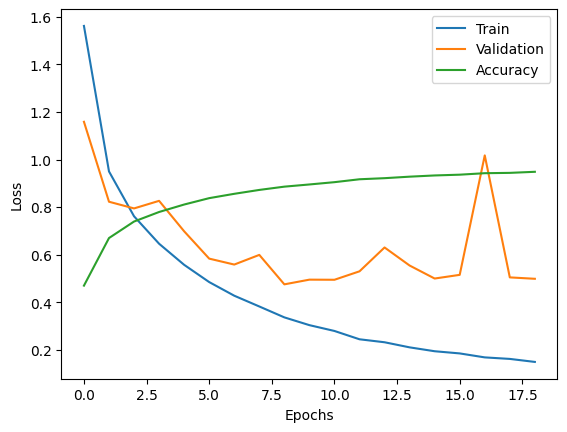

In [16]:
plotloss(history)